In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_excel(r'train_f.xlsx')

In [ ]:
test = pd.read_excel(r'test_file.xlsx')
dev = pd.read_excel(r'dev_file.xlsx')

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


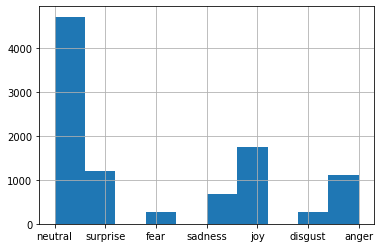

In [ ]:
df.Emotion.hist()
plt.show()

In [ ]:
df.Emotion.value_counts()

neutral     4709
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [ ]:
def LabelFunc(rating):
    if rating == 'neutral':
        return 0
    elif rating == 'anger':
        return 1
    elif rating == 'disgust':
        return 2
    elif rating == 'fear':
        return 3
    elif rating == 'joy':
        return 4
    elif rating == 'sadness':
        return 5
    elif rating == 'surprise':
        return 6  

df['Label'] = df['Emotion'].apply(LabelFunc)    

In [ ]:
df = df[['Utterance','Emotion','Label']]

In [ ]:
#df_0 = df[df.Label==0]
#df_1 = df[df.Label==1]
#df_2 = df[df.Label==2]
#df_3 = df[df.Label==3]
#df_4 = df[df.Label==4]
#df_5 = df[df.Label==5]
#df_6 = df[df.Label==6]

In [ ]:
#df_0_sampled = df_0.sample(2000)

In [ ]:
# Sampled data
#df_new = pd.concat([df_0_sampled, df_1, df_2, df_3, df_4, df_5, df_6], axis=0)

In [ ]:
df_new = df.copy()
df_new.shape

(9988, 3)

In [ ]:
#df_new = df_new.sample(frac=1).reset_index(drop=True)

In [ ]:
df_new.head()

,Utterance,Emotion,Label
0,also I was the point person on my company’s tr...,neutral,0
1,You must’ve had your hands full.,neutral,0
2,That I did. That I did.,neutral,0
3,So let’s talk a little bit about your duties.,neutral,0
4,My duties? All right.,surprise,6


In [ ]:
df_new.shape

(9988, 3)

In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"must've": "must have",
"should've": "should have"
}

In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

df_new['CleanText'] = df_new['Utterance'].apply(clean_text)

In [ ]:
df_new.head()

,Utterance,Emotion,Label,CleanText
0,also I was the point person on my company’s tr...,neutral,0,also point person company transition system
1,You must’ve had your hands full.,neutral,0,must hand full
2,That I did. That I did.,neutral,0,
3,So let’s talk a little bit about your duties.,neutral,0,let talk little bit duty
4,My duties? All right.,surprise,6,duty right


In [ ]:
dev.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, he’s lost it. He’s totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,You’re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we won’t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [ ]:
dev.shape

(1109, 11)

In [ ]:
dev['Label'] = dev['Emotion'].apply(LabelFunc)

In [ ]:
dev = dev[['Utterance','Emotion','Label']]
dev.head()

,Utterance,Emotion,Label
0,"Oh my God, he’s lost it. He’s totally lost it.",sadness,5
1,What?,surprise,6
2,"Or! Or, we could go to the bank, close our acc...",neutral,0
3,You’re a genius!,joy,4
4,"Aww, man, now we won’t be bank buddies!",sadness,5


In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

dev['CleanText'] = dev['Utterance'].apply(clean_text)

In [ ]:
dev.head()

,Utterance,Emotion,Label,CleanText
0,"Oh my God, he’s lost it. He’s totally lost it.",sadness,5,god lost totally lost
1,What?,surprise,6,
2,"Or! Or, we could go to the bank, close our acc...",neutral,0,could bank close account cut source
3,You’re a genius!,joy,4,genius
4,"Aww, man, now we won’t be bank buddies!",sadness,5,aww man bank buddy


In [ ]:
test.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,Why do all you’re coffee mugs have numbers on ...,Mark,surprise,positive,0,0,3,19,"00:14:38,127","00:14:40,378"
1,2,Oh. That’s so Monica can keep track. That way ...,Rachel,anger,negative,0,1,3,19,"00:14:40,629","00:14:47,385"
2,3,Y'know what?,Rachel,neutral,neutral,0,2,3,19,"00:14:56,353","00:14:57,520"
3,19,"Come on, Lydia, you can do it.",Joey,neutral,neutral,1,0,1,23,"0:10:44,769","0:10:46,146"
4,20,Push!,Joey,joy,positive,1,1,1,23,"0:10:46,146","0:10:46,833"


In [ ]:
test['Label'] = test['Emotion'].apply(LabelFunc)

In [ ]:
test = test[['Utterance','Emotion','Label']]
test.head()

,Utterance,Emotion,Label
0,Why do all you’re coffee mugs have numbers on ...,surprise,6
1,Oh. That’s so Monica can keep track. That way ...,anger,1
2,Y'know what?,neutral,0
3,"Come on, Lydia, you can do it.",neutral,0
4,Push!,joy,4


In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    reformed = ' '.join(reformed)
    return reformed

test['CleanText'] = test['Utterance'].apply(clean_text)

In [ ]:
test.head()

,Utterance,Emotion,Label,CleanText
0,Why do all you’re coffee mugs have numbers on ...,surprise,6,coffee mug number bottom
1,Oh. That’s so Monica can keep track. That way ...,anger,1,monica keep track way one missing like number
2,Y'know what?,neutral,0,
3,"Come on, Lydia, you can do it.",neutral,0,come lydia
4,Push!,joy,4,push


# Defining Multi Class Log Loss

In [ ]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

### Define a scorer to be used in Grid Search

In [ ]:
mll_scorer = metrics.make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

In [ ]:
X_train = df_new[['CleanText']]
X_dev = dev[['CleanText']]
X_test = test[['CleanText']]
Y_train = df_new[['Label']]
Y_dev = dev[['Label']]
Y_test = test[['Label']]

# Model 2: TFIDF

In [ ]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(df_new['CleanText']) + list(dev['CleanText']) + list(test['CleanText']))
X_train_tfv =  tfv.transform(df_new['CleanText']) 
X_valid_tfv = tfv.transform(dev['CleanText'])
X_test_tfv = tfv.transform(test['CleanText'])

In [ ]:
X_train_tfv.shape,X_valid_tfv.shape,X_test_tfv.shape

((9988, 3336), (1109, 3336), (2610, 3336))

In [ ]:
#Y_train.values[:200]

## SVM model

In [ ]:
# hyperparameter tuning parameters
params_grid = [{'kernel':['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1e-1, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1e-1, 1, 10, 100, 1000]}]

In [ ]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid,
                       n_jobs = -1,
                       verbose = 10, refit=True,cv=5)
svm_model.fit(X_train_tfv, Y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 10.8min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_tfv)

Best score for training data: 0.5147666444611863 

Best C: 1 

Best Kernel: linear 

Best Gamma: scale 



In [ ]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], 
#colnames=['Predicted Activity']))
print(confusion_matrix(Y_test,Y_pred))
print("\n")
print(classification_report(Y_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train_tfv , Y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_tfv, Y_test))

svm_model.score

[[1191   10    0    1   40    5    9]
 [ 301   17    1    0   18    2    6]
 [  59    3    3    0    1    1    1]
 [  41    3    0    0    1    3    2]
 [ 311    6    1    0   69    3   12]
 [ 176    2    0    0    9   15    6]
 [ 198   12    0    0    6    2   63]]


              precision    recall  f1-score   support

           0       0.52      0.95      0.67      1256
           1       0.32      0.05      0.09       345
           2       0.60      0.04      0.08        68
           3       0.00      0.00      0.00        50
           4       0.48      0.17      0.25       402
           5       0.48      0.07      0.13       208
           6       0.64      0.22      0.33       281

    accuracy                           0.52      2610
   macro avg       0.43      0.22      0.22      2610
weighted avg       0.49      0.52      0.42      2610

Training set score for SVM: 0.585444
Testing  set score for SVM: 0.520307


<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)>

# SVM with truncated SVD

In [ ]:
# Apply SVD, I chose 120 components. 120-200 components are good enough for SVM model.
svd = decomposition.TruncatedSVD(n_components=120)
svd.fit(X_train_tfv)
X_train_svd = svd.transform(X_train_tfv)
X_valid_svd = svd.transform(X_valid_tfv)
X_test_svd = svd.transform(X_test_tfv)

# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
scl = preprocessing.StandardScaler()
scl.fit(X_train_svd)
X_train_svd_scl = scl.transform(X_train_svd)
X_valid_svd_scl = scl.transform(X_valid_svd)
X_test_svd_scl = scl.transform(X_test_svd)

In [ ]:
X_train_svd_scl.shape,X_valid_svd_scl.shape,X_test_svd_scl.shape

((9989, 120), (1109, 120), (2610, 120))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

# initialize Our first RandomForestRegressor model...
svm = SVC(C=1)
regr2 = CalibratedClassifierCV(svm)
# declare parameters for hyperparameter tuning
regr2.fit(X_train_svd_scl, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CalibratedClassifierCV(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                          class_weight=None, coef0=0.0,
                                          decision_function_shape='ovr',
                                          degree=3, gamma='scale', kernel='rbf',
                                          max_iter=-1, probability=False,
                                          random_state=None, shrinking=True,
                                          tol=0.001, verbose=False),
                       cv=None, method='sigmoid')

In [ ]:
predictions = regr2.predict(X_train_svd_scl)

In [ ]:
print("Train accuracy:")
print(classification_report(Y_train, predictions))

Train accuracy:
              precision    recall  f1-score   support

           0       0.51      0.98      0.67      4710
           1       0.00      0.00      0.00      1109
           2       0.00      0.00      0.00       271
           3       0.00      0.00      0.00       268
           4       0.70      0.13      0.22      1743
           5       0.54      0.08      0.14       683
           6       0.75      0.24      0.37      1205

    accuracy                           0.52      9989
   macro avg       0.36      0.20      0.20      9989
weighted avg       0.49      0.52      0.41      9989



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = regr2.predict(X_valid_svd_scl)

In [ ]:
print("Dev accuracy:")
print(classification_report(Y_dev, predictions))

Dev accuracy:
              precision    recall  f1-score   support

           0       0.45      0.97      0.61       470
           1       0.00      0.00      0.00       153
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        40
           4       0.41      0.07      0.12       163
           5       0.67      0.07      0.13       111
           6       0.57      0.16      0.25       150

    accuracy                           0.45      1109
   macro avg       0.30      0.18      0.16      1109
weighted avg       0.39      0.45      0.32      1109



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
predictions = regr2.predict(X_test_svd_scl)

In [ ]:
print("Test accuracy:")
print(classification_report(Y_test, predictions))

Test accuracy:
              precision    recall  f1-score   support

           0       0.50      0.97      0.66      1256
           1       0.00      0.00      0.00       345
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00        50
           4       0.54      0.11      0.19       402
           5       0.62      0.04      0.07       208
           6       0.61      0.20      0.30       281

    accuracy                           0.51      2610
   macro avg       0.32      0.19      0.17      2610
weighted avg       0.44      0.51      0.39      2610



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Word Vectors

In [ ]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
from tqdm import tqdm

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['CleanText']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████| 9989/9989 [00:00<00:00, 76794.31it/s]

9989
300


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_dev['CleanText']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████| 1109/1109 [00:00<00:00, 50064.94it/s]

1109
300


In [ ]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['CleanText']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████| 2610/2610 [00:00<00:00, 83368.62it/s]

2610
300


In [ ]:
xtrain_glove = np.array(avg_w2v_vectors_train)
xvalid_glove = np.array(avg_w2v_vectors_cv)
xtest_glove = np.array(avg_w2v_vectors_test)

In [ ]:
import xgboost as xgb

# Fitting a simple xgboost on glove features
clf = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1, silent=False)
clf.fit(xtrain_glove, Y_train)
predictions = clf.predict(xvalid_glove)


print ("Dev loss:")
print(classification_report(Y_dev, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Dev loss:
              precision    recall  f1-score   support

           0       0.47      0.94      0.62       470
           1       0.13      0.03      0.04       153
           2       0.67      0.09      0.16        22
           3       0.33      0.03      0.05        40
           4       0.36      0.15      0.21       163
           5       0.61      0.10      0.17       111
           6       0.55      0.15      0.23       150

    accuracy                           0.46      1109
   macro avg       0.45      0.21      0.21      1109
weighted avg       0.43      0.46      0.35      1109



In [ ]:
predictions = clf.predict(xtest_glove)

print ("Test loss:")
print(classification_report(Y_test, predictions))

Test loss:
              precision    recall  f1-score   support

           0       0.52      0.92      0.66      1256
           1       0.32      0.05      0.09       345
           2       0.75      0.04      0.08        68
           3       0.00      0.00      0.00        50
           4       0.51      0.22      0.31       402
           5       0.49      0.08      0.14       208
           6       0.62      0.22      0.32       281

    accuracy                           0.52      2610
   macro avg       0.46      0.22      0.23      2610
weighted avg       0.49      0.52      0.43      2610



# MPL

In [ ]:
# scale the data before any neural net:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)
xtest_glove_scl = scl.transform(xtest_glove)

In [ ]:
y_train_nn = np_utils.to_categorical(Y_train)
y_cv_nn = np_utils.to_categorical(Y_dev)
y_test_nn = np_utils.to_categorical(Y_test)

In [ ]:
model = Sequential()

model.add(Dense(128, input_dim=300, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(7))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               38528     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 256)               1024      
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

In [ ]:
history = model.fit(xtrain_glove_scl, y=y_train_nn, batch_size=64, 
          epochs=10, verbose=1, 
          validation_data=(xtest_glove_scl, y_test_nn))

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 2.0160 - accuracy: 0.3032 - val_loss: 1.4729 - val_accuracy: 0.5138
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 1.6205 - accuracy: 0.4504 - val_loss: 1.4264 - val_accuracy: 0.5184
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 1.5155 - accuracy: 0.4848 - val_loss: 1.4278 - val_accuracy: 0.5184
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 1.4733 - accuracy: 0.4983 - val_loss: 1.4030 - val_accuracy: 0.5165
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 1.4446 - accuracy: 0.5016 - val_loss: 1.3935 - val_accuracy: 0.5184
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 1.4113 - accuracy: 0.5139 - val_loss: 1.3858 - val_accuracy: 0.5222
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 1.3990 - accuracy: 0.5150 - val_loss: 1.3827 - val_accuracy: 0.5199
Epoch 

In [ ]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 70
a =list(X_train['CleanText']) + list(X_dev['CleanText']) + list(X_test['CleanText'])
token.fit_on_texts(a)
xtrain_seq = token.texts_to_sequences(X_train['CleanText'])
xvalid_seq = token.texts_to_sequences(X_dev['CleanText'])
xtest_seq = token.texts_to_sequences(X_test['CleanText'])

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)

word_index = token.word_index

In [ ]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

  0%|          | 0/5268 [00:00<?, ?it/s]


NameError: ignored